## 08 - *Cross Validation* de los Resultados
La validación cruzada que se va a calcular, es la llamada *Monte Carlo Cross-Validation*, donde se extraer en set aleatorio del 65\% (en este caso), y se intenta predecir los resultados de el porcentaje restante. Este cálculo se realizará 1000 veces obteniendo al final, la media de las 1000 regresiones realizadas con el algoritmo de *Support Vector Machines Regression*. De este modo, todos los datos que forman la curva, quedan entrenados.

In [1]:
# Librerias para manipular los datos
import pandas as pd
import numpy as np

# Librerias para hacer los gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los warnings
import warnings
warnings.filterwarnings("ignore")

# ML libraries
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Otras librerías utilizadas
import random
import math

# Estilo de los gráficos
sns.set_theme(style="whitegrid")
#sns.color_palette('Set2')

In [2]:
# Cargo los datos de las medias
media = np.genfromtxt("../resultados/datos/mest_media_shif.csv",delimiter=",")
urteak = np.genfromtxt("../resultados/datos/urteak_mest.csv",delimiter=",")
sat = np.genfromtxt(f"../resultados/datos/anomalias_aire.csv",delimiter=",")
urteak_sat = np.arange(1880,2022)

# Datos que se van a utlizar para el modelo
x = urteak.reshape(-1,1)
y = media

In [3]:
# Genero el data frame
df_final =pd.DataFrame(index=np.arange(1464,1963))

score=[]
# 325 es el 65%                      
for i in range(1,1001):               
    #Genero un set de train del 65% de mi data
    x65 = []
    y65 = []
    for j in range(325):
        n = random.randint(0,len(media)-1)
        x65.append(x[n])
        y65.append(y[n])
        
    # Aplicar el modelo de regresión a mis datos
    regr = make_pipeline(SVR(C=10))
    regr.fit(x65, y65)
    score.append(regr.score)
    yfit = regr.predict(x)
    
    # Guardo cada uno de los resultado en una columna del dataframe
    df_final[f"{i}"]=yfit

In [4]:
# Calculo la media de todas las regresiones realizada
df_final
df_final.transpose()
mean = df_final.mean(axis="columns").to_numpy()

In [5]:
# Cáculo de el error éstandar
std_error=[]
for j in range(len(mean)):
    suma = 0
    for i in mean[j:]:
        suma = (suma +abs(i)**2)
        
    std_dec = math.sqrt(suma)/(math.sqrt(len(mean)))
    std_error.append(std_dec)

In [6]:
# Sumar el error estandar a la media
sumar=[]

for i in range(len(mean)):
    sumar.append(mean[i]+std_error[i])


# Restar el error estandar a la media
resta=[]
for i in range(len(mean)):
    resta.append(mean[i]-std_error[i])

Text(0, 0.5, 'Anomalías de Temperatura')

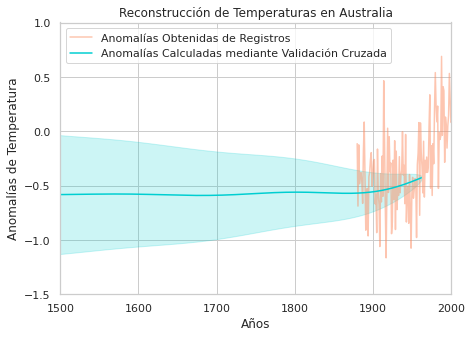

In [7]:
# Gráfico de los resultados obtenido por Cross-Validation
plt.figure(figsize=(7,5))
plt.plot(urteak_sat,sat,label="Anomalías Obtenidas de Registros", color=sns.color_palette('Set2')[1],alpha=0.5)
plt.plot(df_final.mean(axis = "columns"),label="Anomalías Calculadas mediante Validación Cruzada",color="darkturquoise")
plt.fill_between(urteak, sumar,resta,alpha = 0.2,color="darkturquoise")

plt.legend(loc="best")
plt.ylim(-1.5,1.0)
plt.xlim(1500,2000)
plt.title("Reconstrucción de Temperaturas en Australia")
plt.xlabel("Años")
plt.ylabel("Anomalías de Temperatura")